In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,62.8818,66.0,72.0,48.0,63.0,80.0,76.0
1,0.0,0.0,166.8310,148.0,143.0,180.0,178.0,157.0,147.0
2,0.0,0.0,17.2891,10.0,24.0,21.0,17.0,17.0,15.0
3,0.0,0.0,56.5721,50.0,51.0,55.0,56.0,60.0,58.0
4,0.0,0.0,105.7230,90.0,103.0,106.0,99.0,111.0,108.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,119.8860,118.0,107.0,122.0,127.0,124.0,99.0
996,0.0,0.0,45.6632,46.0,46.0,45.0,30.0,43.0,49.0
997,0.0,0.0,50.5879,46.0,57.0,54.0,51.0,46.0,42.0
998,0.0,0.0,229.0040,222.0,218.0,228.0,251.0,205.0,240.0


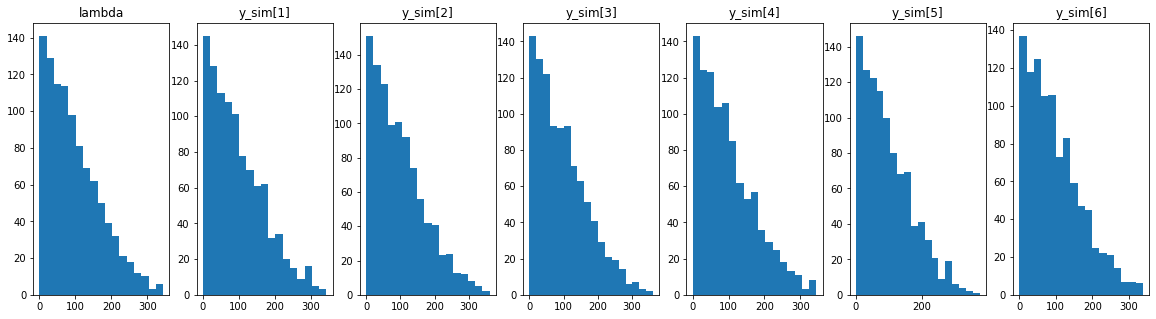

In [3]:
F = 6 #number of letters in first name

samples = gen_quant.sample(data={'M': F}, 
                            fixed_param=True,
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

#Plot a histogram for each of y_sim(poison distribution) and lambda(folded normal distribution)
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

for i, data_title in enumerate(list(df.columns)[2:]):
    axs[i].hist(df[data_title], bins='auto')
    axs[i].set_title(data_title)
    
plt.show()
    

## Excercise 2 - Constraints on the data 

In [4]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})


# 1.The main difference between code_2.stan and code_3.stan is in the lower bound constraint on the parameter N. 
#In code_2.stan, N can take any positive integer value, including 1, whereas in code_3.stan, N must be greater than or equal to 1. 
#This means that the model defined in code_3.stan is more restrictive than the one in code_2.stan.

#This difference in constraints means that code_3.stan ensures that there is at least one observation in the data, 
#which is necessary for the model to be well-defined. In contrast, code_2.stan allows for the possibility of an empty dataset, 
#which would not be valid for this model

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [6]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▌         | 00:00 Iteration:  200 / 7000 [  2%]  (Warmup)


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)



chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 4200 / 7000 [ 60%]  (Sampling)


chain 1 |██████▋   | 00:01 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |███████   | 00:02 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |███████▌  |


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_4-20230319102539_1.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_4-20230319102539_2.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_4-20230319102539_3.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_4-20230319102539_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


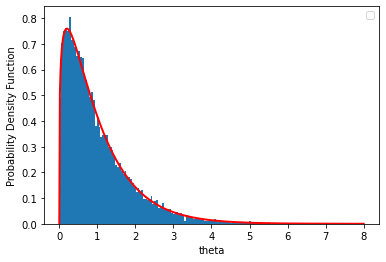

In [7]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2, color = 'red')

## add histogram of theta samples with 160 bins
df = out_gamma1.draws_pd()

plt.hist(df['theta'], bins=160, density = True)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.legend()
plt.show()


### Constrained parameter

In [8]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███       | 00:00 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▊      | 00:00 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |████▎     | 00:01 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |█████▏    | 00:01 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▌    | 00:01 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▉    | 00:01 Iteration: 4000 / 7000 [ 57%]  (Sampling)


chain 1 |██████▍   | 00:01 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▏  | 00:02 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 5200 / 7000 [ 74%]  (Sampling)


chain 1 |███████▉  | 00:02 Iteration: 5400 / 7000 [ 77%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 5600 / 7000 [ 80%]  (Sampling)


chain 1 |███████

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_5-20230319102544_1.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_5-20230319102544_2.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_5-20230319102544_3.csv, /home/LaboratoryClasses_Data_Analitycs/Lab_2_Intro_to_stan/samples/code_5-20230319102544_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nPro

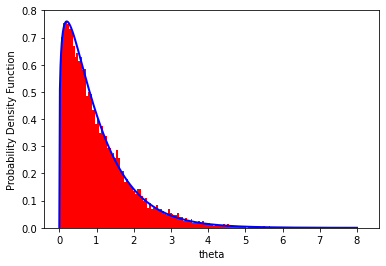

In [9]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2, color = 'blue')

## add histogram of theta samples from the second model with 160 bins
df = out_gamma2.draws_pd()

plt.hist(df['theta'], bins=160, density = True, color = 'red')
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


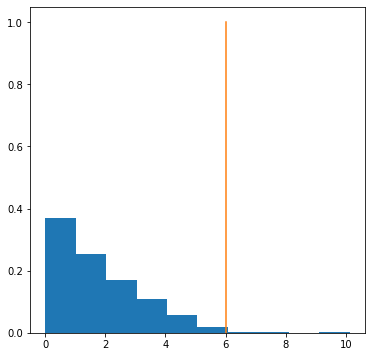

In [10]:
model_tune = CmdStanModel(stan_file='code_6.stan')

# number of letters in the first name
F = 6

# number of letters in the last name
L = 6
 
# initial guess for the equation solving
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

sigma = tunes.draws_pd()['sigma'][0]
half_normal = np.abs(np.random.normal(0, sigma, 1000))
x_line = np.array([(F+L)/2, (F+L)/2])
y_line = np.array([0, 1])

plt.figure(figsize = (6,6))
plt.hist(half_normal, density=True)
plt.plot(x_line, y_line)
plt.show()


## Excercise 5 - different methods of defining models


In [11]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)


SyntaxError: invalid syntax (3391715747.py, line 5)

In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable